In [1]:
filename = "D:/ALEYNA/DERSLER/ARTIFICIAL INTELLIGENCE/steam.csv"

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv(filename, header=None, index_col=None, names=['GameID', 'Review', 'ReviewSentiment', 'Helpful'])

In [4]:
# Data Discovery
df.head()

,GameID,Review,ReviewSentiment,Helpful
0,10,Ruined my life.,1,0
1,10,This will be more of a ''my experience with th...,1,1
2,10,This game saved my virginity.,1,0
3,10,• Do you like original games? • Do you like ga...,1,0
4,10,"Easy to learn, hard to master.",1,1


In [5]:
df.describe()

,GameID,ReviewSentiment,Helpful
count,6.417106e+06,6.417106e+06,6.417106e+06
mean,2.274695e+05,6.394992e-01,1.472446e-01
std,1.260451e+05,7.687918e-01,3.543496e-01
min,1.000000e+01,-1.000000e+00,0.000000e+00
25%,2.018100e+05,1.000000e+00,0.000000e+00
50%,2.391600e+05,1.000000e+00,0.000000e+00
75%,3.056200e+05,1.000000e+00,0.000000e+00
max,5.653400e+05,1.000000e+00,1.000000e+00


In [6]:
print("Number of games : {0}".format(len(df.GameID.unique())))

Number of games : 9972


In [7]:
print("Number of positive reviews : {0}".format(len(df.loc[df['ReviewSentiment'] == 1])))
print("Number of negative reviews : {0}".format(len(df.loc[df['ReviewSentiment'] == -1])))
print("Number of reviews : {0}".format(len(df.Review)))

Number of positive reviews : 5260420
Number of negative reviews : 1156686
Number of reviews : 6417106


In [8]:
# Access only to positive reviews of the game
good_reviews = df.loc[df['ReviewSentiment']==1, ['GameID']]

# Access onlt to negative reviews of the game
bad_reviews = df.loc[df['ReviewSentiment']==-1, ['GameID']]

In [9]:
# groupby the gameID and count each gameID and sort from most to least
review_times_good = good_reviews.groupby('GameID')['GameID'].agg('count').sort_values(ascending=False)

# groupby the gameID and count each gameID and sort from most to least
review_times_bad = bad_reviews.groupby('GameID')['GameID'].agg('count').sort_values(ascending=False)

In [10]:
# top 10 for good reviews
review_times_good = pd.DataFrame({'GameID': review_times_good.index, 'ReviewTimes' : review_times_good.values})[0:10]

# top 10 for bad reviews
review_times_bad = pd.DataFrame({'GameID': review_times_bad.index, 'ReviewTimes' : review_times_bad.values})[0:10]

In [11]:
review_times_good.head(10)

,GameID,ReviewTimes
0,105600,82350
1,570,62923
2,218620,61765
3,252490,61032
4,221100,58847
5,252950,51120
6,391540,49851
7,550,47183
8,230410,43749
9,620,38448


In [12]:
review_times_bad.head(10)

,GameID,ReviewTimes
0,221100,30003
1,218620,27208
2,252490,16005
3,301520,12556
4,227940,11977
5,271590,11019
6,570,10618
7,311210,10527
8,275850,8512
9,208650,7287


In [13]:
import json

In [14]:
# read the game list json file to get the game names
gameNames = open('D:/ALEYNA/DERSLER/ARTIFICIAL INTELLIGENCE/steam_gameid_list.json', encoding="utf8")
gameNamesData = json.load(gameNames)

In [15]:
gameNamesData = gameNamesData.get('applist').get('apps')

In [16]:
# list of dictionary
gameNamesData

[{'appid': 216938, 'name': 'Pieterw test app76 ( 216938 )'},
 {'appid': 660010, 'name': 'test2'},
 {'appid': 660130, 'name': 'test3'},
 {'appid': 1118314, 'name': ''},
 {'appid': 379030, 'name': 'Sierra Ops Legacy (2015) Demo'},
 {'appid': 379040, 'name': 'The Adventures of Tree Demo'},
 {'appid': 379190, 'name': 'SAMURAI WARRIORS 4-II - Weapon Set'},
 {'appid': 379191, 'name': 'SAMURAI WARRIORS 4-II - Exclusive Costume Set'},
 {'appid': 379200, 'name': 'Undone: Project Nightmare Demo'},
 {'appid': 379210, 'name': 'Wayward'},
 {'appid': 379230, 'name': 'FSX: Steam Edition - Pushing the Envelope Add-On'},
 {'appid': 379231, 'name': 'FSX: Steam Edition - Granville Gee Bee Model Z'},
 {'appid': 379232, 'name': 'FSX: Steam Edition - Messerschmitt BF 109 Add-On'},
 {'appid': 379233, 'name': 'FSX: Steam Edition - 3D Lights Redux Add-On'},
 {'appid': 379234, 'name': 'FSX Orbx Asset Library'},
 {'appid': 379235, 'name': 'FSX: Steam Edition - Friday Harbor (KFHR) Add-On'},
 {'appid': 379240, 'n

In [17]:
# get one of the games name from the list of dictionary that contains the steam appid and names
next(item['name'] for item in gameNamesData if item["appid"] == 105600)

'Terraria'

In [18]:
game_names_list_good = []
game_names_list_bad = []


In [19]:
# get names of top 10 reviewed games' names
for index, revItem in review_times_good.iterrows():
        for item in gameNamesData:
            if revItem['GameID']==item["appid"]:
                print("App name: " + item["name"])
                game_names_list_good.append(item["name"])

        

App name: Terraria
App name: Dota 2
App name: PAYDAY 2
App name: Rust
App name: DayZ
App name: Rocket League
App name: Undertale
App name: Left 4 Dead 2
App name: Warframe
App name: Portal 2


In [20]:
# get names of top 10 reviewed games' names
for index, revItem in review_times_bad.iterrows():
        for item in gameNamesData:
            if revItem['GameID']==item["appid"]:
                print("App name: " + item["name"])
                game_names_list_bad.append(item["name"])

        

App name: DayZ
App name: PAYDAY 2
App name: Rust
App name: Robocraft
App name: Heroes & Generals
App name: Grand Theft Auto V
App name: Dota 2
App name: Call of Duty: Black Ops III
App name: No Man's Sky
App name: Batman™: Arkham Knight


In [21]:
game_names_list_good

['Terraria',
 'Dota 2',
 'PAYDAY 2',
 'Rust',
 'DayZ',
 'Rocket League',
 'Undertale',
 'Left 4 Dead 2',
 'Warframe',
 'Portal 2']

In [22]:
game_names_list_bad

['DayZ',
 'PAYDAY 2',
 'Rust',
 'Robocraft',
 'Heroes & Generals',
 'Grand Theft Auto V',
 'Dota 2',
 'Call of Duty: Black Ops III',
 "No Man's Sky",
 'Batman™: Arkham Knight']

In [23]:
top_reviewed_games_good = pd.DataFrame({'GameID': review_times_good.GameID, 'ReviewTimes' : review_times_good.ReviewTimes, 'GameName':game_names_list_good})

top_reviewed_games_bad = pd.DataFrame({'GameID': review_times_bad.GameID, 'ReviewTimes' : review_times_bad.ReviewTimes, 'GameName':game_names_list_bad})

In [24]:
top_reviewed_games_good

,GameID,ReviewTimes,GameName
0,105600,82350,Terraria
1,570,62923,Dota 2
2,218620,61765,PAYDAY 2
3,252490,61032,Rust
4,221100,58847,DayZ
5,252950,51120,Rocket League
6,391540,49851,Undertale
7,550,47183,Left 4 Dead 2
8,230410,43749,Warframe
9,620,38448,Portal 2


In [25]:
top_reviewed_games_bad

,GameID,ReviewTimes,GameName
0,221100,30003,DayZ
1,218620,27208,PAYDAY 2
2,252490,16005,Rust
3,301520,12556,Robocraft
4,227940,11977,Heroes & Generals
5,271590,11019,Grand Theft Auto V
6,570,10618,Dota 2
7,311210,10527,Call of Duty: Black Ops III
8,275850,8512,No Man's Sky
9,208650,7287,Batman™: Arkham Knight


In [26]:
import seaborn as sns

Text(0.5, 1.0, 'Top Bad Reviewed Games')

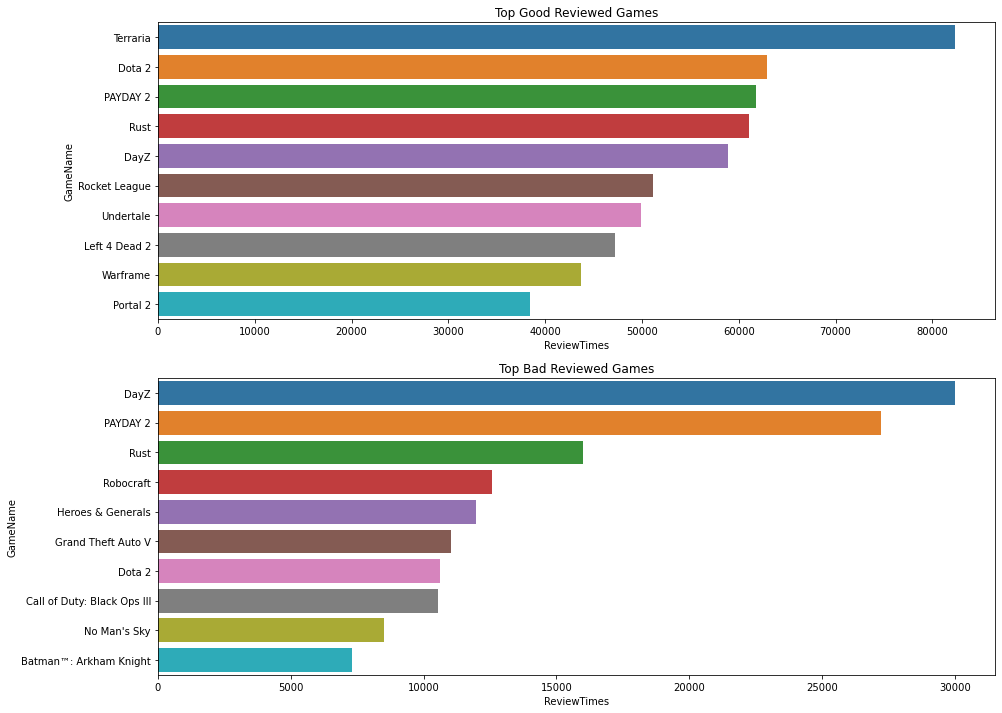

In [27]:
fig, ax =plt.subplots(2,1,figsize=(15,12))

sns.barplot(y = top_reviewed_games_good.GameName, x = top_reviewed_games_good.ReviewTimes, data = top_reviewed_games_good.ReviewTimes, ax=ax[0]).set_title('Top Good Reviewed Games')
sns.barplot(y = top_reviewed_games_bad.GameName, x = top_reviewed_games_bad.ReviewTimes, data = top_reviewed_games_bad.ReviewTimes, ax=ax[1]).set_title('Top Bad Reviewed Games')

In [28]:
# Next Part
df.describe()

,GameID,ReviewSentiment,Helpful
count,6.417106e+06,6.417106e+06,6.417106e+06
mean,2.274695e+05,6.394992e-01,1.472446e-01
std,1.260451e+05,7.687918e-01,3.543496e-01
min,1.000000e+01,-1.000000e+00,0.000000e+00
25%,2.018100e+05,1.000000e+00,0.000000e+00
50%,2.391600e+05,1.000000e+00,0.000000e+00
75%,3.056200e+05,1.000000e+00,0.000000e+00
max,5.653400e+05,1.000000e+00,1.000000e+00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   GameID           int64 
 1   Review           object
 2   ReviewSentiment  int64 
 3   Helpful          int64 
dtypes: int64(3), object(1)
memory usage: 195.8+ MB


In [30]:
df.head()

,GameID,Review,ReviewSentiment,Helpful
0,10,Ruined my life.,1,0
1,10,This will be more of a ''my experience with th...,1,1
2,10,This game saved my virginity.,1,0
3,10,• Do you like original games? • Do you like ga...,1,0
4,10,"Easy to learn, hard to master.",1,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df['ReviewSentiment'] = df['ReviewSentiment'].replace(np.nan,0)
df['ReviewSentiment'] = df['ReviewSentiment'].replace(-1,0)

In [33]:
reviews = df['Review'].apply(lambda x: np.str_(x)).values
labels = df['ReviewSentiment'].values

train_data, test_data, y_train, y_test = train_test_split(reviews,
                                                         labels,
                                                         test_size=0.3,
                                                         )

In [34]:
print("Train set and train labels:", train_data.shape,y_train.shape)
print("Test set and test labels:", test_data.shape, y_test.shape)

Train set and train labels: (4491974,) (4491974,)
Test set and test labels: (1925132,) (1925132,)


In [35]:
#onceki
print("Train set and train labels:", train_data.shape,y_train.shape)

Train set and train labels: (4491974,) (4491974,)


In [36]:
#onceki
print("Test set and test labels:", test_data.shape, y_test.shape)

Test set and test labels: (1925132,) (1925132,)


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(train_data)

X_train = vectorizer.transform(train_data)
X_test = vectorizer.transform(test_data)


In [39]:
print("Train set and test set:", X_train.shape,X_test.shape)


Train set and test set: (4491974, 1000) (1925132, 1000)


In [40]:
vectorizer.vocabulary_

{'hate': 407,
 'this': 867,
 'game': 360,
 'ending': 276,
 'is': 459,
 'great': 387,
 'cant': 141,
 'wait': 932,
 'for': 344,
 'the': 855,
 'full': 354,
 'based': 86,
 'it': 463,
 'just': 472,
 'well': 951,
 'worth': 981,
 'price': 686,
 'so': 795,
 'many': 537,
 'and': 54,
 'content': 193,
 'added': 26,
 'keyboard': 476,
 'controls': 197,
 'are': 64,
 'if': 444,
 'you': 994,
 'dont': 253,
 'have': 408,
 'controller': 196,
 'say': 745,
 'enough': 284,
 'about': 15,
 'to': 878,
 'do': 246,
 'only': 624,
 'negative': 596,
 'can': 139,
 'even': 291,
 'think': 864,
 'of': 611,
 'that': 853,
 'there': 859,
 'no': 602,
 'sort': 803,
 'online': 623,
 'multiplayer': 584,
 'which': 959,
 'like': 501,
 'really': 713,
 'bad': 83,
 'thing': 862,
 'miss': 559,
 'out': 637,
 'on': 619,
 'one': 621,
 'too': 883,
 'much': 583,
 'an': 53,
 'good': 383,
 'me': 547,
 'money': 571,
 'all': 39,
 'games': 362,
 'im': 445,
 'not': 606,
 'sure': 840,
 'with': 968,
 'haven': 409,
 'played': 665,
 'same': 741,


In [41]:
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

In [42]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(128,activation='relu',input_dim=input_dim))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               128128    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 128,257
Trainable params: 128,257
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model_history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


C:\Users\Almira-PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


140375/140375 [==============================] - 397s 3ms/step - loss: 0.3078 - accuracy: 0.8749 - val_loss: 0.2906 - val_accuracy: 0.8827
Epoch 2/10
140375/140375 [==============================] - 633s 4ms/step - loss: 0.2870 - accuracy: 0.8846 - val_loss: 0.2885 - val_accuracy: 0.8840
Epoch 3/10
140375/140375 [==============================] - 1127s 8ms/step - loss: 0.2821 - accuracy: 0.8871 - val_loss: 0.2864 - val_accuracy: 0.8848
Epoch 4/10
140375/140375 [==============================] - 1408s 10ms/step - loss: 0.2780 - accuracy: 0.8887 - val_loss: 0.2865 - val_accuracy: 0.8852
Epoch 5/10
140375/140375 [==============================] - 1610s 11ms/step - loss: 0.2789 - accuracy: 0.8892 - val_loss: 0.2878 - val_accuracy: 0.8846
Epoch 6/10
140375/140375 [==============================] - 1822s 13ms/step - loss: 0.2751 - accuracy: 0.8899 - val_loss: 0.2872 - val_accuracy: 0.8848
Epoch 7/10
140375/140375 [==============================] - 1769s 13ms/step - loss: 0.2745 - accuracy: 0

In [45]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))

loss,accuracy = model.evaluate(X_test,y_test,verbose=False)
print("Test accuracy:{:.4f}".format(accuracy))

Training accuracy: 0.8922
Test accuracy:0.8843


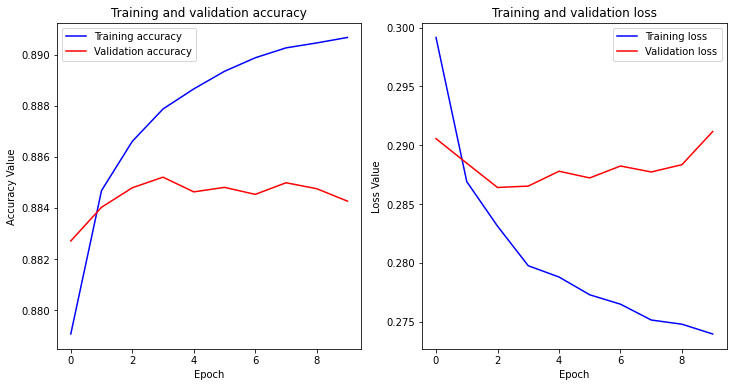

In [46]:
import matplotlib.pyplot as plt

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss =  model_history.history['loss']
val_loss =  model_history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(acc,'b',label='Training accuracy')
plt.plot(val_acc,'r',label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss,'b',label='Training loss')
plt.plot(val_loss,'r',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Training and validation loss')
plt.legend()